# Interactive Data Visualization

In [5]:
%matplotlib notebook 

from sklearn.linear_model import Ridge

from sklearn.datasets import load_boston 
from yellowbrick.regressor import ResidualsPlot 
from sklearn.model_selection import train_test_split as tts

from ipywidgets import interactive 

In [4]:
data = load_boston()
X_train, X_test, y_train, y_test = tts(data.data, data.target, test_size=0.20)

<IPython.core.display.Javascript object>


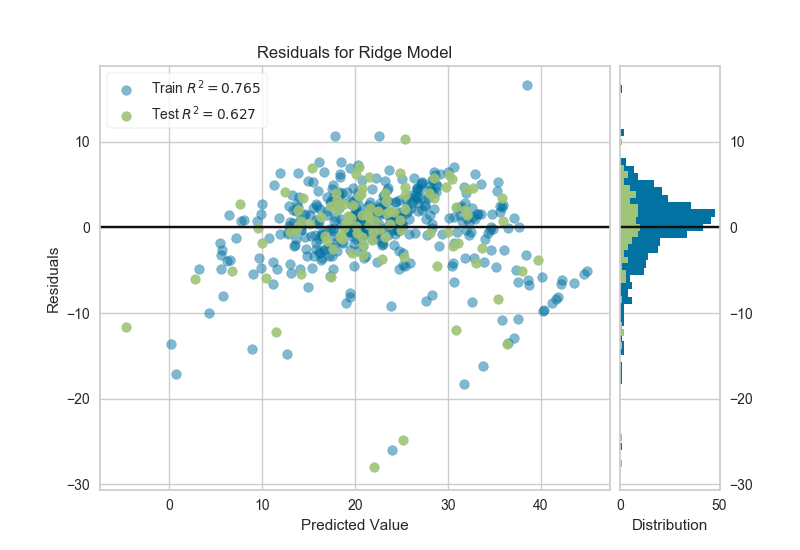

In [7]:
def plot_residuals(model):
    viz = ResidualsPlot(model)
    viz.fit(X_train, y_train)
    viz.score(X_test, y_test)
    viz.poof()
    
plot_residuals(Ridge())